In [1]:
import keras 
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, SeparableConv2D
from keras.regularizers import l2
from keras.optimizers import SGD, RMSprop
from keras.utils import to_categorical
from keras.layers import BatchNormalization, concatenate
from keras.utils.vis_utils import plot_model
from keras.layers import Input, GlobalAveragePooling2D
from keras import models
from keras.models import Model

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
data = pd.read_csv("Train_data.csv")
data['label'] = data['label'].astype(str)
data['img'] = data['img'].apply(lambda x : x[2:])

image_datagen = ImageDataGenerator(rescale=1./255)

train_imgs = image_datagen.flow_from_dataframe(
    dataframe=data,
    directory='C:/Users/Mohamed Ali/Documents/Semester_6/Artificial_Intelligence/Project/Trackmania_Self_Driving_AI_env',
    x_col='img',
    y_col=['label', 'steer'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='multi_output',
    validate_filenames=False
)

Found 48787 non-validated image filenames.


In [16]:
input_img = Input(shape=(224, 224, 3), name='img_input')
input_array = Input(shape=(11,), name='array_input')
### 1st layer
layer_1 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_1 = Conv2D(10, (3,3), padding='same', activation='relu')(layer_1)

layer_2 = Conv2D(10, (1,1), padding='same', activation='relu')(input_img)
layer_2 = Conv2D(10, (5,5), padding='same', activation='relu')(layer_2)

layer_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
layer_3 = Conv2D(10, (1,1), padding='same', activation='relu')(layer_3)

mid_1 = concatenate([layer_1, layer_2, layer_3], axis = 3)
merged = Dropout(0.5)(mid_1)

In [17]:
flat_1 = Flatten()(merged)
flat_2 = Flatten()(input_array)
merged = concatenate([flat_1, flat_2])

classification_output = Dense(1, activation='sigmoid', name='classification_output')(merged)
linear_output = Dense(1, activation='linear', name='linear_output')(merged)

model = Model(inputs=[input_img, input_array], outputs=[classification_output, linear_output])


In [18]:
model.compile(optimizer='adam', loss={'classification_output': 'binary_crossentropy', 'linear_output': 'mse'}, metrics=['accuracy'])

In [19]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img_input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 224, 224, 10  40          ['img_input[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_7 (Conv2D)              (None, 224, 224, 10  40          ['img_input[0][0]']              
                                )                                                           

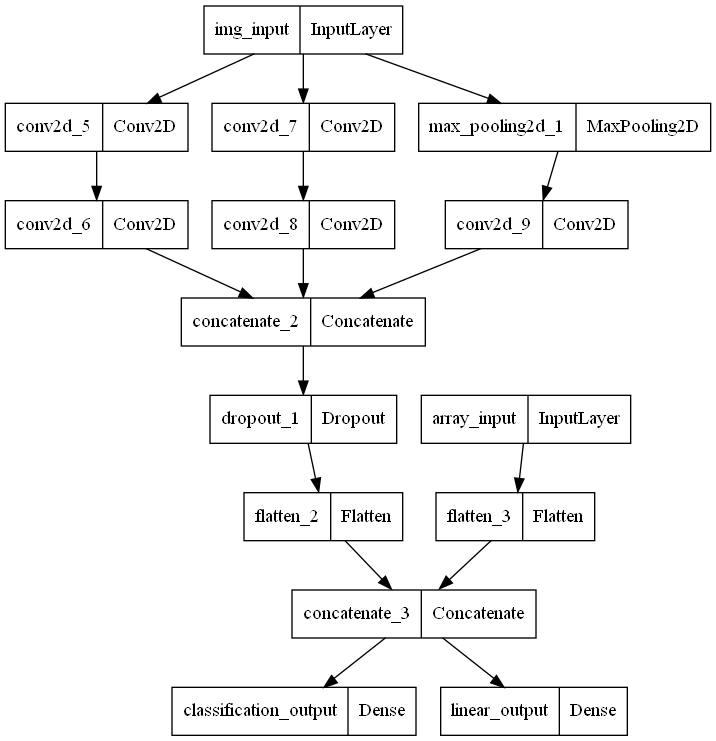

In [20]:
import tensorflow as tf
tf.keras.utils.plot_model(model)

In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3)
checkpoint = ModelCheckpoint('inception_model.h5', monitor='val_accuracy', save_best_only=True)

In [22]:
features = data[['left_15',
                 'left_30',
                 'left_45',
                 'left_60',
                 'left_75',
                 'right_15',
                 'right_30',
                 'right_45',
                 'right_60',
                 'right_75',
                 'speed']]
model.fit(x={"":train_imgs, "":features},
          y=
          epochs=50,
          batch_size=32,
          callbacks=[early_stop, checkpoint])

AttributeError: 'ImageDataGenerator' object has no attribute 'load_img'